In [1]:
import pandas as pd
import numpy as np
import sklearn

import os

import warnings
warnings.filterwarnings('ignore')



In [2]:
os.getcwd()

'e:\\risk_model\\code'

In [3]:
os.listdir("../dataset")

['dataset.txt', 'lc_2016_2017.csv', 'lc_loan.csv']

In [4]:
loan_data = pd.read_csv('../dataset/lc_2016_2017.csv')
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,112435993,NaN,2300,2300,2300.0,36 months,12.62,77.08,C,C1,...,0.0,NaN,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0
1,112290210,NaN,16000,16000,16000.0,60 months,12.62,360.95,C,C1,...,11078.0,69.0,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0
2,112436985,NaN,6025,6025,6025.0,36 months,15.05,209.01,C,C4,...,0.0,NaN,1.0,2.0,1950.0,45.0,27700.0,1.0,5.0,3.0
3,112439006,NaN,20400,20400,20400.0,36 months,9.44,652.91,B,B1,...,53566.0,95.0,1.0,2.0,4240.0,60.0,46900.0,1.0,1.0,1.0
4,112438929,NaN,13000,13000,13000.0,36 months,11.99,431.73,B,B5,...,8466.0,72.0,0.0,1.0,2996.0,78.0,7800.0,0.0,0.0,0.0


In [5]:
loan_data.shape

(759338, 72)

In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           759338 non-null  int64  
 1   member_id                    0 non-null       float64
 2   loan_amnt                    759338 non-null  int64  
 3   funded_amnt                  759338 non-null  int64  
 4   funded_amnt_inv              759338 non-null  float64
 5   term                         759338 non-null  object 
 6   int_rate                     759338 non-null  float64
 7   installment                  759338 non-null  float64
 8   grade                        759338 non-null  object 
 9   sub_grade                    759338 non-null  object 
 10  emp_title                    708368 non-null  object 
 11  emp_length                   708975 non-null  object 
 12  home_ownership               759338 non-null  object 
 13 

### Use load_status as target variable

In [7]:
loan_data.loan_status.unique()

array(['Current', 'Fully Paid', 'In Grace Period', 'Late (31-120 days)',
       'Late (16-30 days)', 'Charged Off', 'Default'], dtype=object)

In [8]:
loan_data['good_bad'] = np.where(loan_data.loc[:, 'loan_status'].isin(['Change_off', "Defaul", "Late (31-120 days)", "Late (16-30 days)"]), 1,0)

In [9]:
loan_data.good_bad.value_counts()

good_bad
0    740108
1     19230
Name: count, dtype: int64

In [10]:
df = loan_data[["loan_status", "good_bad"]]

df

,loan_status,good_bad
0,Current,0
1,Current,0
2,Current,0
3,Current,0
4,Current,0
...,...,...
759333,Current,0
759334,Current,0
759335,Late (16-30 days),1
759336,Current,0


### Mising Values Checked

In [11]:
missing_values = pd.DataFrame(loan_data.isnull().sum() / loan_data.shape[0])

missing_values

,0
id,0.000000
member_id,1.000000
loan_amnt,0.000000
funded_amnt,0.000000
funded_amnt_inv,0.000000
...,...
total_rev_hi_lim,0.000000
inq_fi,0.000080
total_cu_tl,0.000082
inq_last_12m,0.000082


check for >50% missing values

In [12]:
missing_values = missing_values[missing_values.iloc[:, 0]>0.50]

missing_values.sort_values([0], ascending=False)

,0
member_id,1.000000
desc,0.999978
dti_joint,0.955223
annual_inc_joint,0.955220
verification_status_joint,0.955220
mths_since_last_record,0.814076
mths_since_last_major_derog,0.716720


In [13]:
#removed missing values > 50%

loan_data.dropna(thresh=loan_data.shape[0]*0.5, axis=1, inplace=True)


In [14]:
missing_values = pd.DataFrame(loan_data.isnull().sum() / loan_data.shape[0])

missing_values

,0
id,0.000000
loan_amnt,0.000000
funded_amnt,0.000000
funded_amnt_inv,0.000000
term,0.000000
...,...
total_rev_hi_lim,0.000000
inq_fi,0.000080
total_cu_tl,0.000082
inq_last_12m,0.000082


In [15]:
missing_values = missing_values[missing_values.iloc[:, 0]>0.50]

missing_values.sort_values([0], ascending=False)

,0


### Data Splitting (Train & Test)

In [16]:
loan_data.shape

(759338, 66)

In [17]:
#split data into train 80% and 20% test 

from sklearn.model_selection import train_test_split

X = loan_data.drop('good_bad', axis=1)
y = loan_data['good_bad']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, stratify= y, random_state= 42)

X_train.shape, X_test.shape 


((607470, 65), (151868, 65))

In [18]:
y_train.value_counts(normalize=True)

good_bad
0    0.974675
1    0.025325
Name: proportion, dtype: float64

In [19]:
y_test.value_counts(normalize=True)

good_bad
0    0.974675
1    0.025325
Name: proportion, dtype: float64

### Data_Cleaning

In [20]:
# X_train.select_dtypes(include= ['object','bool'])

#check data types

for col in X_train.select_dtypes(include= ['object','bool']).columns:
    print(col)
    print(X_train[col].unique())
    print()


term
['36 months' '60 months']

grade
['B' 'C' 'A' 'D' 'E' 'G' 'F']

sub_grade
['B4' 'C4' 'C3' 'A2' 'B3' 'C1' 'D5' 'B2' 'C2' 'A4' 'E2' 'C5' 'B1' 'B5'
 'D4' 'D3' 'G3' 'A1' 'D1' 'E3' 'E5' 'A5' 'E1' 'A3' 'D2' 'E4' 'F4' 'F5'
 'F1' 'F2' 'G5' 'G4' 'G2' 'G1' 'F3']

emp_title
['Technical Director' 'Bartender' 'Service Advisor' ...
 'eCommerce Consultant' 'Supervising Sr Engr' 'VP, Compliance Manager']

emp_length
['4 years' '6 years' '1 year' '10+ years' nan '2 years' '5 years'
 '< 1 year' '8 years' '9 years' '7 years' '3 years']

home_ownership
['RENT' 'MORTGAGE' 'OWN' 'ANY' 'NONE']

verification_status
['Not Verified' 'Source Verified' 'Verified']

issue_d
['Jul-2016' 'Apr-2017' 'Jun-2017' 'May-2017' 'Aug-2016' 'Apr-2016'
 'Jun-2016' 'Jan-2017' 'Mar-2017' 'Jan-2016' 'Mar-2016' 'Oct-2016'
 'Feb-2017' 'Aug-2017' 'Jul-2017' 'Dec-2016' 'Nov-2016' 'Feb-2016'
 'May-2016' 'Sep-2017' 'Sep-2016']

loan_status
['Fully Paid' 'Current' 'Charged Off' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 d

In [21]:
# loan_data.info()
# print(loan_data['term'])

object_type = loan_data.select_dtypes(include='object')
print(object_type.head().to_string())
print("\n")
print(loan_data.columns)

        term grade sub_grade     emp_title emp_length home_ownership verification_status   issue_d loan_status pymnt_plan             purpose                    title zip_code addr_state earliest_cr_line initial_list_status last_pymnt_d next_pymnt_d last_credit_pull_d application_type
0  36 months     C        C1           NaN        NaN            OWN        Not Verified  Jun-2017     Current          n         credit_card  Credit card refinancing    148xx         NY         Sep-1985                   w     Dec-2017     Jan-2018           Dec-2017       Individual
1  60 months     C        C1       teacher  10+ years       MORTGAGE        Not Verified  Jun-2017     Current          n  debt_consolidation       Debt consolidation    021xx         MA         Jun-1992                   w     Dec-2017     Jan-2018           Dec-2017       Individual
2  36 months     C        C4  Front Office    7 years       MORTGAGE        Not Verified  Jun-2017     Current          n    home_improvement 

In [22]:
col_to_clean = ['term','emp_length', 'issue_d', 'earliest_cr_line','last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d' ]

col_to_clean

['term',
 'emp_length',
 'issue_d',
 'earliest_cr_line',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d']

In [23]:
X_train['term'].unique()

array(['36 months', '60 months'], dtype=object)

In [24]:
#replace data type to numeric
change = pd.to_numeric(X_train['term'].str.replace('months', ''))
change

292199    36
105150    36
20468     36
51794     36
240190    36
          ..
67465     60
376057    36
580549    36
562964    36
502585    36
Name: term, Length: 607470, dtype: int64

In [25]:
#replace term column
X_train['term'] = change

X_train['term']

292199    36
105150    36
20468     36
51794     36
240190    36
          ..
67465     60
376057    36
580549    36
562964    36
502585    36
Name: term, Length: 607470, dtype: int64

In [26]:
X_train['emp_length'].unique()

array(['4 years', '6 years', '1 year', '10+ years', nan, '2 years',
       '5 years', '< 1 year', '8 years', '9 years', '7 years', '3 years'],
      dtype=object)

In [27]:
X_train['emp_length'] = X_train['emp_length'].str.replace('\+ years', '')
X_train['emp_length'] = X_train['emp_length'].str.replace(' years', '')
X_train['emp_length'] = X_train['emp_length'].str.replace('< 1 year', str(0))
X_train['emp_length'] = X_train['emp_length'].str.replace('+', '')
X_train['emp_length'] = X_train['emp_length'].str.replace(' year', '')

X_train['emp_length'].fillna(value = 0, inplace=True)

X_train['emp_length'].head()


292199     4
105150     6
20468      1
51794     10
240190    10
Name: emp_length, dtype: object

In [28]:
X_train['emp_length'] = pd.to_numeric(X_train['emp_length'])

X_train['emp_length']

292199     4
105150     6
20468      1
51794     10
240190    10
          ..
67465      1
376057     7
580549    10
562964     5
502585     2
Name: emp_length, Length: 607470, dtype: int64

In [29]:
col_date = ['issue_d', 'earliest_cr_line','last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d' ]

X_train[col_date]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
292199,Jul-2016,Mar-1993,Aug-2017,NaN,Dec-2017
105150,Apr-2017,Jun-2005,Dec-2017,Jan-2018,Dec-2017
20468,Jun-2017,Oct-2013,Dec-2017,Jan-2018,Dec-2017
51794,May-2017,May-2000,Dec-2017,Jan-2018,Dec-2017
240190,Aug-2016,May-2002,Dec-2017,Jan-2018,Dec-2017
...,...,...,...,...,...
67465,May-2017,Apr-2003,Dec-2017,Jan-2018,Dec-2017
376057,Aug-2017,May-2006,Dec-2017,Jan-2018,Dec-2017
580549,Nov-2016,May-1996,May-2017,NaN,Sep-2017
562964,Nov-2016,Jul-2002,Dec-2017,Jan-2018,Dec-2017


In [30]:
X_train['issue_d'] = pd.to_datetime(X_train['issue_d'])
X_train['issue_d']

292199   2016-07-01
105150   2017-04-01
20468    2017-06-01
51794    2017-05-01
240190   2016-08-01
            ...    
67465    2017-05-01
376057   2017-08-01
580549   2016-11-01
562964   2016-11-01
502585   2016-04-01
Name: issue_d, Length: 607470, dtype: datetime64[ns]

In [31]:
for col in col_date:
    X_train[col] = pd.to_datetime(X_train[col])
    
X_train[col_date]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
292199,2016-07-01,1993-03-01,2017-08-01,NaT,2017-12-01
105150,2017-04-01,2005-06-01,2017-12-01,2018-01-01,2017-12-01
20468,2017-06-01,2013-10-01,2017-12-01,2018-01-01,2017-12-01
51794,2017-05-01,2000-05-01,2017-12-01,2018-01-01,2017-12-01
240190,2016-08-01,2002-05-01,2017-12-01,2018-01-01,2017-12-01
...,...,...,...,...,...
67465,2017-05-01,2003-04-01,2017-12-01,2018-01-01,2017-12-01
376057,2017-08-01,2006-05-01,2017-12-01,2018-01-01,2017-12-01
580549,2016-11-01,1996-05-01,2017-05-01,NaT,2017-09-01
562964,2016-11-01,2002-07-01,2017-12-01,2018-01-01,2017-12-01


In [32]:
# Lakukan hal yang sama untuk X_test
X_test['term'] = pd.to_numeric(X_test['term'].str.replace(' months', ''))


In [33]:

X_test['emp_length'] = X_test['emp_length'].str.replace('\+ years', '')
X_test['emp_length'] = X_test['emp_length'].str.replace(' years', '')
X_test['emp_length'] = X_test['emp_length'].str.replace('+', '')
X_test['emp_length'] = X_test['emp_length'].str.replace('< 1 year', str(0))
X_test['emp_length'] = X_test['emp_length'].str.replace(' year', '')

X_test['emp_length'].fillna(value = 0, inplace=True)
X_test['emp_length'].head()
X_test['emp_length'] = pd.to_numeric(X_test['emp_length'])


In [34]:

for col in col_date:
    X_test[col] = pd.to_datetime(X_test[col])

In [35]:
# X_test['term']
# X_test['emp_length']

# Checking
X_test[col_to_clean]
# X_train[col_to_clean].info()




,term,emp_length,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
731928,36,2,2016-01-01,2003-08-01,2017-01-01,NaT,2017-06-01
490795,36,10,2016-04-01,2005-04-01,2017-11-01,2018-01-01,2017-12-01
1867,36,10,2017-06-01,1991-02-01,2017-12-01,2018-01-01,2017-12-01
21621,60,2,2017-06-01,1990-05-01,2017-12-01,2018-01-01,2017-12-01
206820,60,2,2016-09-01,2005-12-01,2017-12-01,2018-01-01,2017-12-01
...,...,...,...,...,...,...,...
427665,60,10,2016-06-01,2000-08-01,2017-12-01,2018-01-01,2017-12-01
577833,36,9,2016-11-01,2006-02-01,2017-10-01,2018-01-01,2017-12-01
378099,36,10,2017-08-01,1987-09-01,2017-12-01,2018-01-01,2017-12-01
316886,36,2,2017-09-01,2006-11-01,2017-12-01,2018-01-01,2017-12-01


### Modelling

In [36]:
col_to_clean

['term',
 'emp_length',
 'issue_d',
 'earliest_cr_line',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d']

In [37]:
X_train = X_train[col_to_clean]
X_test = X_test[col_to_clean]

In [38]:
# del X_train['next_pymnt_d']
# del X_test['next_pymnt_d']

X_train.shape, X_test.shape

((607470, 7), (151868, 7))

In [39]:
X_train.head()

,term,emp_length,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
292199,36,4,2016-07-01,1993-03-01,2017-08-01,NaT,2017-12-01
105150,36,6,2017-04-01,2005-06-01,2017-12-01,2018-01-01,2017-12-01
20468,36,1,2017-06-01,2013-10-01,2017-12-01,2018-01-01,2017-12-01
51794,36,10,2017-05-01,2000-05-01,2017-12-01,2018-01-01,2017-12-01
240190,36,10,2016-08-01,2002-05-01,2017-12-01,2018-01-01,2017-12-01


Feature Engineering

In [40]:
#change data type to numeric

from datetime import date

date.today().strftime("%Y-%m-%d")

'2024-09-03'

In [52]:
def date_col(df, column):
    today_data = pd.to_datetime(date.today().strftime("%Y-%m-%d"))

    # Fungsi untuk menghitung jumlah bulan antara dua tanggal
    def calculate_month_diff(start_date, end_date):
        return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month

    # Menerapkan fungsi calculate_month_diff untuk setiap nilai pada kolom
    df['mths_since_' + column] = df[column].apply(lambda x: calculate_month_diff(pd.to_datetime(x), today_data))

    # Menghapus kolom asli
    df.drop(columns=[column], inplace=True)

    
#apply to x train

date_col(X_train, 'issue_d')
date_col(X_train, 'earliest_cr_line')
date_col(X_train, 'last_pymnt_d')
date_col(X_train, 'last_credit_pull_d')

# apply to x test

date_col(X_test, 'issue_d')
date_col(X_test, 'earliest_cr_line')
date_col(X_test, 'last_pymnt_d')
date_col(X_test, 'last_credit_pull_d')

In [53]:
pd.to_datetime(date.today().strftime("%Y-%m-%d")) - pd.to_datetime('2017-02-01')



Timedelta('2771 days 00:00:00')

In [55]:
X_test.drop(columns=['next_pymnt_d'], inplace=True)
X_train.drop(columns=['next_pymnt_d'], inplace=True)

In [56]:
X_test

,term,emp_length,mths_since_issue_d,mths_since_earliest_cr_line,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
731928,36,2,104,253,92,87
490795,36,10,101,233,82,81
1867,36,10,87,403,81,81
21621,60,2,87,412,81,81
206820,60,2,96,225,81,81
...,...,...,...,...,...,...
427665,60,10,99,289,81,81
577833,36,9,94,223,83,81
378099,36,10,85,444,81,81
316886,36,2,84,214,81,81


In [57]:
X_test.isnull().sum()
# X_train.isnull().sum()

term                             0
emp_length                       0
mths_since_issue_d               0
mths_since_earliest_cr_line      0
mths_since_last_pymnt_d          0
mths_since_last_credit_pull_d    0
dtype: int64

In [58]:
#Handle Missing Value

X_train.fillna(X_train.median(), inplace= True)
X_test.fillna(X_test.median(), inplace= True)

### Accuracy Checked


In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
model = LogisticRegression()
    

In [61]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [62]:
result = pd.DataFrame(list(zip(y_pred,y_test)), columns=['y_pred', 'y_test'])
result


,y_pred,y_test
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
151863,0,0
151864,0,1
151865,0,0
151866,0,0


In [63]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9746753759844076

Text(50.722222222222214, 0.5, 'y_test')

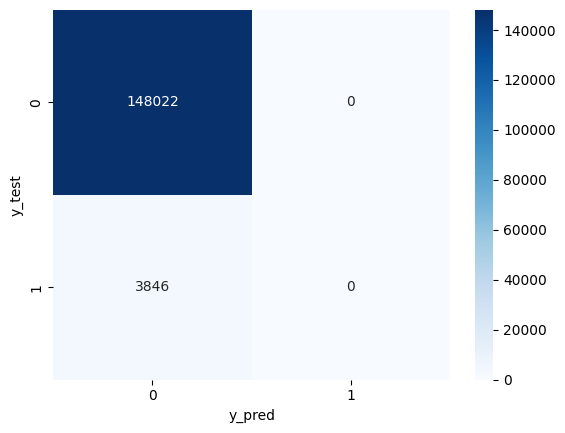

In [64]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel('y_pred')
plt.ylabel('y_test')

In [65]:
y_train.value_counts(normalize=True)

good_bad
0    0.974675
1    0.025325
Name: proportion, dtype: float64

### Modelling II

In [66]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [71]:
y_pred = model.predict_proba(X_test)[:, 1]

#labelling column output

# model = pd.DataFrame(model.predict_proba(X_test), columns=['good', 'bad'])

In [72]:
y_pred

array([0.0076068 , 0.02912198, 0.01683544, ..., 0.01548859, 0.02269322,
       0.00793876])

In [81]:
(y_pred > 0.5).astype(int)

array([0, 0, 0, ..., 0, 0, 0])

(array([3.40430e+04, 1.08181e+05, 6.34500e+03, 1.84900e+03, 8.37000e+02,
        3.88000e+02, 1.72000e+02, 4.50000e+01, 5.00000e+00, 3.00000e+00]),
 array([4.11195925e-06, 1.96628209e-02, 3.93215299e-02, 5.89802388e-02,
        7.86389478e-02, 9.82976568e-02, 1.17956366e-01, 1.37615075e-01,
        1.57273784e-01, 1.76932493e-01, 1.96591202e-01]),
 <BarContainer object of 10 artists>)

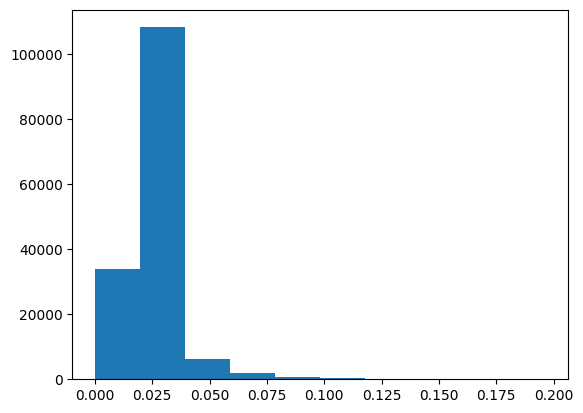

In [82]:
plt.hist(y_pred)

threshold

In [83]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

thresholds

array([           inf, 1.96591202e-01, 1.11848694e-01, ...,
       1.02519235e-04, 1.02361613e-04, 4.11195925e-06])

In [84]:
#youden j static

j = tpr - fpr

ix = np.argmax(j)
best_thresh = thresholds[ix]
best_thresh

0.026482689996261414

In [93]:
y_pred = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred> 0.027).astype(int)

Text(50.722222222222214, 0.5, 'y_test')

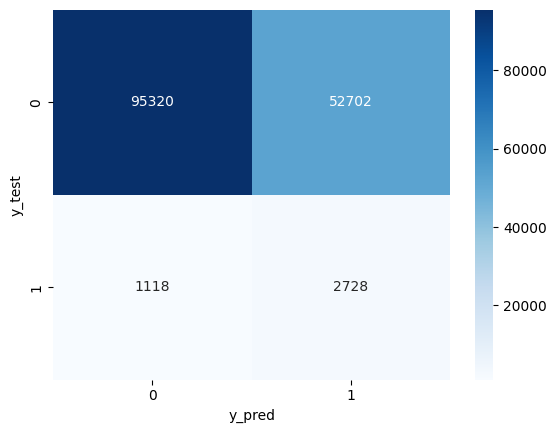

In [94]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel('y_pred')
plt.ylabel('y_test')

logistic regresion

In [95]:
model.coef_

array([[ 0.00744451, -0.02539607,  0.02367479, -0.00091223,  0.07405614,
        -0.39347975]])

In [98]:
model.intercept_

array([20.09990371])

In [97]:
df_coef = pd.DataFrame(model.coef_, columns=X_train.columns)
df_coef

,term,emp_length,mths_since_issue_d,mths_since_earliest_cr_line,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
0,0.007445,-0.025396,0.023675,-0.000912,0.074056,-0.39348


In [96]:
X_train.head()

,term,emp_length,mths_since_issue_d,mths_since_earliest_cr_line,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
292199,36,4,98,378,85.0,81.0
105150,36,6,89,231,81.0,81.0
20468,36,1,87,131,81.0,81.0
51794,36,10,88,292,81.0,81.0
240190,36,10,97,268,81.0,81.0
